In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="------------------------------")
project = rf.workspace("attirely-senang").project("attirely-hmm")
version = project.version(1)
dataset = version.download("folder")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 795.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cy

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Attirely-hmm-1 in folder:: 100%|██████████| 11450/11450 [00:02<00:00, 3886.79it/s]


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import EfficientNetV2B0
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import uuid
import keras

In [ ]:
print(keras.__version__)
print(tf.__version__)

2.15.0
2.15.0


In [ ]:
train_cloth_datagen = ImageDataGenerator(rescale = 1./255,
                                         rotation_range=10,
                                         zoom_range=0.2,
                                         horizontal_flip=True
                                         )
cloth_train_generator = train_cloth_datagen.flow_from_directory(directory ='/content/Attirely-hmm-1/train',
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    target_size = (256,256))


validation_datagen = ImageDataGenerator (rescale = 1./255)
cloth_val_generator = validation_datagen.flow_from_directory(directory = '/content/Attirely-hmm-1/valid',
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    target_size = (256,256))

Found 10005 images belonging to 7 classes.
Found 1427 images belonging to 7 classes.


In [ ]:
base_model2 = EfficientNetV2B0(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3),
    pooling='max',
    classes=7,
    include_preprocessing=True
)

x = base_model2.output
predictions2 = tf.keras.layers.Dense(7, activation= tf.keras.activations.softmax)(x)

model2 = tf.keras.Model(inputs=base_model2.input, outputs=predictions2)

for layer in base_model2.layers:
    layer.trainable = True

In [ ]:
model2.compile(optimizer = tf.keras.optimizers.Adam(0.0001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_loss') is not None and logs.get('val_loss') < 0.08):
            self.model.stop_training = True
            print('Berhenti')

callbacks = myCallback()

In [ ]:
history2 = model2.fit(cloth_train_generator,
                    batch_size = 32,
                    epochs = 100,
                    validation_data = cloth_val_generator,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/100
313/313 [==============================] - 206s 656ms/step - loss: 0.9606 - accuracy: 0.7387 - val_loss: 0.2818 - val_accuracy: 0.9152
Epoch 2/100
313/313 [==============================] - 196s 627ms/step - loss: 0.2028 - accuracy: 0.9288 - val_loss: 0.2688 - val_accuracy: 0.9124
Epoch 3/100
313/313 [==============================] - 200s 640ms/step - loss: 0.1042 - accuracy: 0.9627 - val_loss: 0.1356 - val_accuracy: 0.9601
Epoch 4/100
313/313 [==============================] - 208s 666ms/step - loss: 0.0702 - accuracy: 0.9762 - val_loss: 0.1112 - val_accuracy: 0.9685
Epoch 5/100
313/313 [==============================] - 202s 645ms/step - loss: 0.0478 - accuracy: 0.9831 - val_loss: 0.0902 - val_accuracy: 0.9755
Epoch 6/100
313/313 [==============================] - 200s 637ms/step - loss: 0.0321 - accuracy: 0.9884 - val_loss: 0.1669 - val_accuracy: 0.9474
Epoch 7/100
313/313 [==============================] - 201s 643ms/step - loss: 0.0244 - accuracy: 0.9918 - val_loss: 0

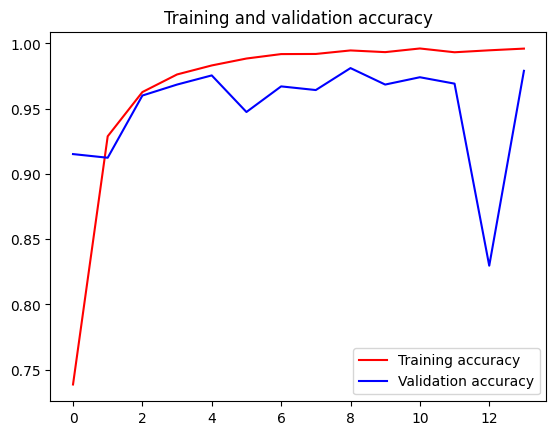

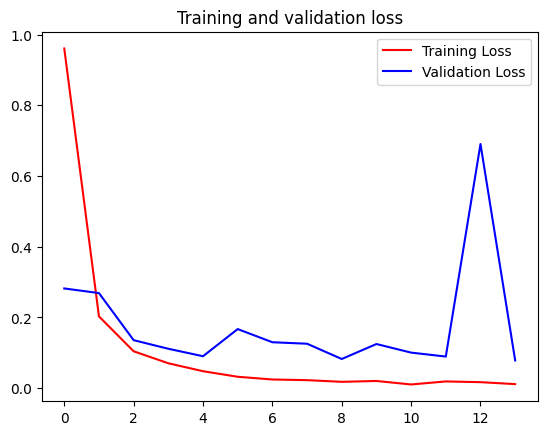

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

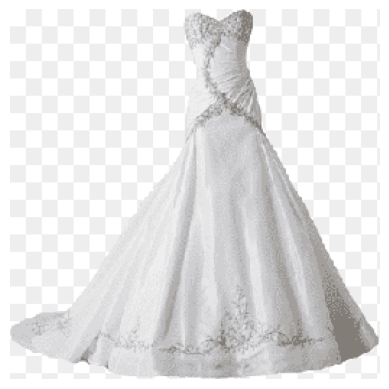

In [ ]:
path = '/content/dress1.png'

img = load_img(path, target_size=(256, 256))
x = img_to_array(img)

plt.imshow(x.astype(int))
plt.axis('off')
plt.show()

In [ ]:
x = img_to_array(img)/255.0
x = np.expand_dims(x, axis=0)

In [ ]:
cloth_class = model2.predict(x)
print(cloth_class)
cloth_class2 = np.argmax(cloth_class)
print(cloth_class2)
if cloth_class2 == 0:
    cloth_class3 = 'Dress'
elif cloth_class2 == 1:
    cloth_class3 = 'Hoodie'
elif cloth_class2 == 2:
    cloth_class3 = 'Pants'
elif cloth_class2 == 3:
    cloth_class3 = 'Shirt'
elif cloth_class2 == 4:
    cloth_class3 = 'Shorts'
elif cloth_class2 == 5:
    cloth_class3 = 'Skirt'
else:
    cloth_class3 = 'Suit'

print(cloth_class3)


1/1 [==============================] - 0s 31ms/step
[[9.8606354e-01 1.2496177e-02 2.4203382e-07 5.3227036e-06 1.0706367e-09
  1.4347092e-03 4.6076458e-08]]
0
Dress


In [ ]:
import zipfile
import os

def unzip_folder(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted all files to {os.path.abspath(extract_to)}")

zip_path = '/content/test.zip'
extract_to = '/content/'
unzip_folder(zip_path, extract_to)

Extracted all files to /content


1/1 [==============================] - 3s 3s/step


IndexError: index 22 is out of bounds for axis 0 with size 22

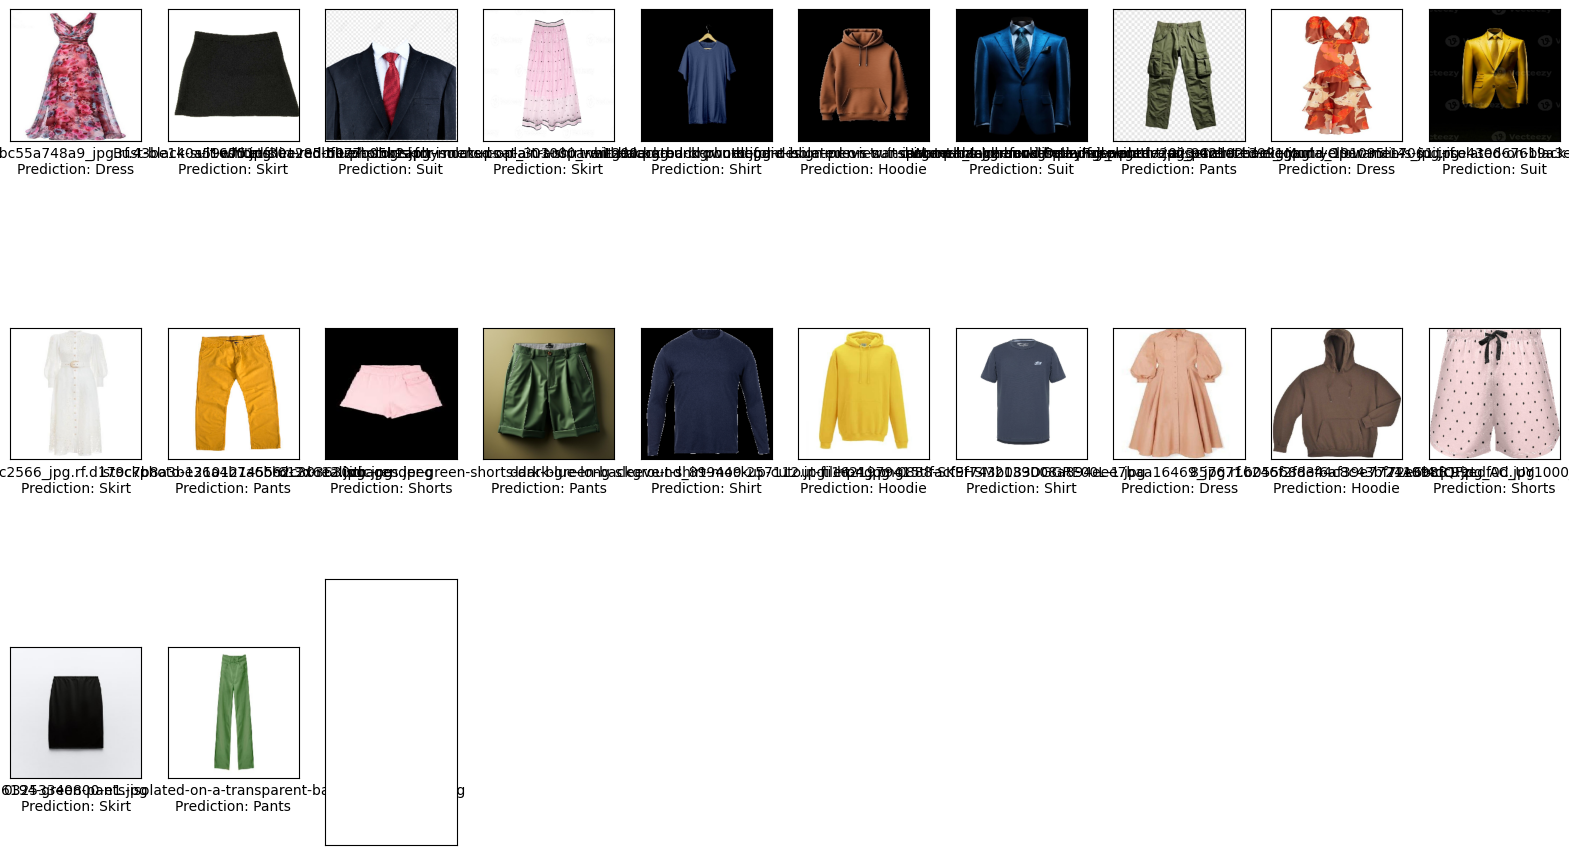

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_dir = '/content/test'

test_images = []
image_names = []

for img_name in os.listdir(test_dir):
    if len(test_images) >= 50:
        break
    img_path = os.path.join(test_dir, img_name)
    img = load_img(img_path, target_size=(256, 256))
    img_array = img_to_array(img) / 255.0
    test_images.append(img_array)
    image_names.append(img_name)

test_images = np.array(test_images)

predictions = model2.predict(test_images)

class_mapping = {0: 'Dress', 1: 'Hoodie', 2: 'Pants', 3: 'Shirt', 4: 'Shorts', 5: 'Skirt', 6: 'Suit'}

plt.figure(figsize=(20, 20))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_class = np.argmax(predictions[i])
    predicted_label = class_mapping.get(predicted_class, 'Unknown')
    plt.xlabel(f"{image_names[i]}\nPrediction: {predicted_label}")
plt.show()


In [ ]:
model.save('cloth_with_suit_:).h5')

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [ ]:
from tensorflow import keras
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model2)

tflite_model = converter.convert()

with open('best6.tflite', 'wb') as f:
    f.write(tflite_model)